In [111]:
import keras
import pandas as pd

In [112]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names, na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [113]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [114]:
df.isnull().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [115]:
df = df.dropna()

In [116]:
df.isnull().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,0
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [117]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


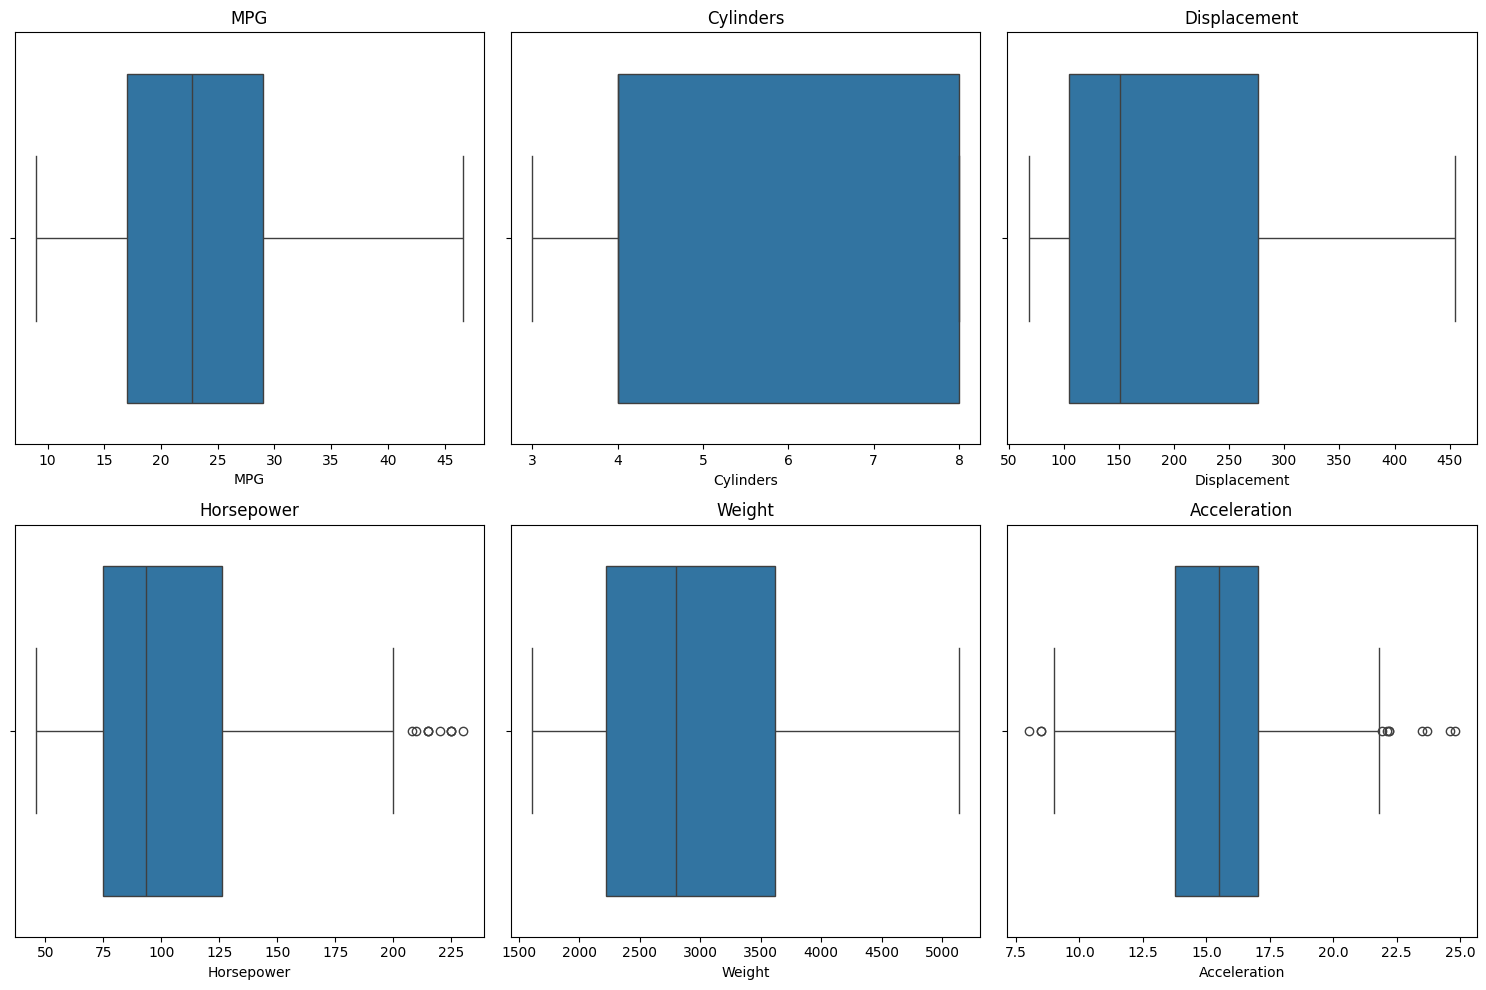

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [119]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [120]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = df.copy() # Create a copy to avoid the warning
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [121]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,70,1
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,70,1
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,70,1
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,70,1
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,70,1


In [122]:
from sklearn.model_selection import train_test_split

X = df.drop('MPG', axis=1)
y = df['MPG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (313, 7)
Shape of X_test: (79, 7)
Shape of y_train: (313,)
Shape of y_test: (79,)


In [123]:
from keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [124]:
model_1=Sequential()
model_1.add(Dense(16, activation='relu', input_shape=(7,)))
model_1.add(Dense(8, activation='relu'))
model_1.add(Dense(1, activation='linear'))

model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273 (1.07 KB)

 Trainable params: 273 (1.07 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
from sklearn.metrics import r2_score

In [128]:
model_1.compile(optimizer='adam', loss='mse', metrics=['r2_score'])
results = model_1.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_train,y_train))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3804 - r2_score: -7.2991 - val_loss: 0.3049 - val_r2_score: -5.8312
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3225 - r2_score: -5.7704 - val_loss: 0.3186 - val_r2_score: -6.1388
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2778 - r2_score: -5.0038 - val_loss: 0.2176 - val_r2_score: -3.8750
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2385 - r2_score: -4.6153 - val_loss: 0.1787 - val_r2_score: -3.0040
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1763 - r2_score: -3.1887 - val_loss: 0.1529 - val_r2_score: -2.4264
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1651 - r2_score: -2.8064 - val_loss: 0.1328 - val_r2_score: -1.9755
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1275 - r2_score: -2.0113 - val_loss: 0.1493 - val_r2_score: -2.3449
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1465 - r2_score: -2.0265 - val_loss

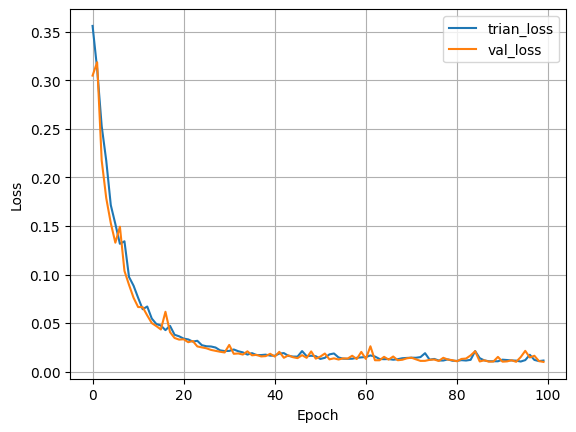

In [129]:
plt.plot(results.history['loss'], label='trian_loss')
plt.plot(results.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

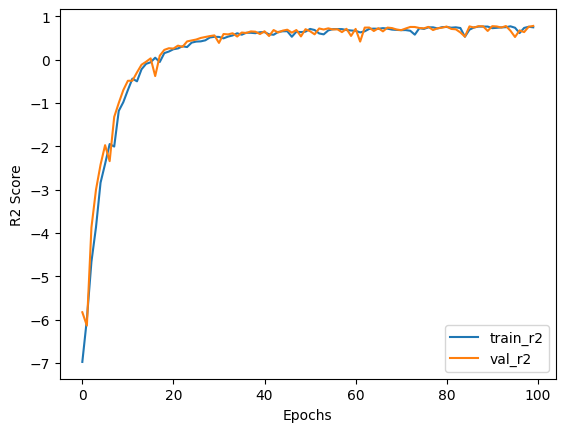

In [130]:
plt.plot(results.history['r2_score'], label='train_r2')
plt.plot(results.history['val_r2_score'], label='val_r2')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.legend()
plt.show()